In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 365 days starting with November 1, 2014
rng = pd.date_range('11/1/2014', periods=365, freq='D')
rng

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06', '2014-11-07', '2014-11-08',
               '2014-11-09', '2014-11-10',
               ...
               '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-10-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [3]:
# generate dataframe with random integer elements between 1000 and 10000 of
# size 100 rows by 365 columns
df = pd.DataFrame(np.random.randint(1000,10000,size=(100, 365)), columns=rng)
df.head()

,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00,2014-11-07 00:00:00,2014-11-08 00:00:00,2014-11-09 00:00:00,2014-11-10 00:00:00,...,2015-10-22 00:00:00,2015-10-23 00:00:00,2015-10-24 00:00:00,2015-10-25 00:00:00,2015-10-26 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-29 00:00:00,2015-10-30 00:00:00,2015-10-31 00:00:00
0,2010,9750,4086,8063,7758,8272,8472,5390,3975,4870,...,6072,2868,2779,1287,4310,1231,7275,9423,1761,3211
1,2272,5900,8119,3193,5262,9935,9817,6028,1885,8639,...,6341,3077,7658,6799,1209,5632,5540,2798,4447,8023
2,1096,2289,1434,6522,9925,8773,9510,6979,1047,1085,...,4703,3408,4707,8096,8764,4973,7942,4992,6418,8059
3,3110,6303,7782,5383,9990,3630,6226,9209,7436,9238,...,9777,3478,8916,4228,5469,6225,6398,2792,8878,9541
4,9667,4269,3435,9590,5330,9906,7785,4673,2539,4520,...,5854,3850,6431,5895,2487,1504,4908,3191,6273,2768


In [4]:
max_options = [110000,  160000, 115000, 130000, 120000]
max_list = []

for i in range(100):
    max_list.append(random.choice(max_options))

In [25]:
df.insert(0,'MaxCapacity',max_list)
df_sorted = df.sort_values(by = 'MaxCapacity')

ValueError: cannot insert MaxCapacity, already exists

In [26]:
df_sorted.head(50)

,MaxCapacity,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00,2014-11-07 00:00:00,2014-11-08 00:00:00,2014-11-09 00:00:00,...,2015-10-22 00:00:00,2015-10-23 00:00:00,2015-10-24 00:00:00,2015-10-25 00:00:00,2015-10-26 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-29 00:00:00,2015-10-30 00:00:00,2015-10-31 00:00:00
50,110000,3300,1937,4396,3306,9925,6130,6264,5490,3301,...,6806,5286,1054,2350,1878,1833,3506,6292,8605,4875
73,110000,1601,5195,6655,8416,3693,7097,8530,3061,3883,...,6493,9200,7450,7690,8223,7399,9636,9981,8715,5557
19,110000,9203,3541,9415,9335,9572,5355,9403,4927,8309,...,8931,4724,3935,8372,2136,4498,7610,7453,5966,5395
76,110000,5043,7484,7858,9471,2401,1732,1819,7236,9751,...,3640,3372,8870,3649,2680,4913,9414,1397,5360,5121
81,110000,8456,5949,8491,5077,8056,9310,2669,8756,5674,...,8999,1056,5069,8554,4273,2698,8625,1202,9179,3849
33,110000,9834,4296,5928,3932,6670,5584,8169,3950,1797,...,4260,1447,4556,2324,1348,1174,7269,3915,8897,7426
9,110000,1764,8430,2353,7681,9500,8674,5457,2957,5912,...,7069,5297,2728,8367,6016,6083,2321,8285,3558,1148
47,110000,2095,4157,2429,9382,7603,4725,5882,4549,6493,...,8954,8193,3580,1143,3556,3753,7861,6962,3789,7750
42,110000,4053,8657,7756,5681,6051,8906,4921,8812,9835,...,9474,4503,6191,8262,9275,9952,1946,6491,7716,5327
43,110000,2676,2538,8699,6065,8084,4673,9515,4740,2229,...,4066,8129,1882,6914,6241,5050,3001,4729,8614,4042


In [17]:
# find how many days it takes to get max capacity for each sample
total_count_list = []

for index, row in df_sorted.iterrows():
    total = 0
    counts_list = []
    dayCounts = 0
    maxC = row[df.columns[0]]
    
    for x in range(1,365):
        total += row[df.columns[x]]
        dayCounts += 1
        if total >= maxC:
            counts_list.append(dayCounts)
            dayCounts = 0
            total = 0
    total_count_list.append(counts_list)
total_count_list

[[22, 22, 20, 17, 21, 21, 20, 21, 22, 25, 18, 21, 21, 18, 21, 21, 20],
 [18, 19, 23, 18, 22, 24, 21, 21, 20, 17, 18, 22, 21, 17, 23, 22, 21, 15],
 [19, 23, 18, 19, 19, 16, 23, 20, 19, 18, 19, 21, 24, 18, 20, 19, 22, 21],
 [21, 18, 19, 19, 24, 22, 19, 21, 22, 22, 19, 20, 19, 18, 20, 19, 21],
 [21, 22, 18, 19, 21, 18, 21, 21, 20, 23, 23, 22, 18, 22, 21, 18, 22],
 [21, 21, 21, 21, 21, 20, 20, 17, 24, 22, 24, 21, 21, 19, 20, 23, 20],
 [18, 20, 24, 22, 22, 19, 23, 22, 20, 21, 20, 22, 22, 22, 20, 20, 22],
 [19, 22, 20, 21, 24, 20, 16, 21, 22, 21, 22, 21, 19, 23, 24, 22, 20],
 [21, 19, 18, 18, 25, 21, 21, 20, 20, 21, 22, 20, 22, 19, 20, 20, 22],
 [20, 23, 19, 22, 18, 21, 20, 21, 23, 24, 17, 23, 20, 23, 18, 18, 21],
 [18, 21, 19, 21, 21, 19, 20, 22, 16, 23, 20, 20, 22, 22, 20, 20, 20],
 [18, 21, 23, 18, 23, 18, 18, 18, 19, 19, 22, 22, 17, 18, 19, 18, 19, 20],
 [20, 18, 23, 22, 23, 19, 23, 22, 22, 24, 18, 25, 23, 18, 23, 21, 19],
 [20, 22, 21, 21, 21, 20, 23, 18, 25, 26, 19, 21, 26, 20, 23, 20]

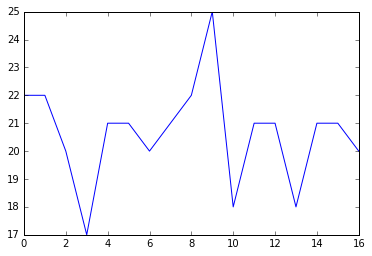

In [18]:
# plot values from 110,000 max group
vals = list(range(len(total_count_list[0])))
plt.plot(vals,total_count_list[0])

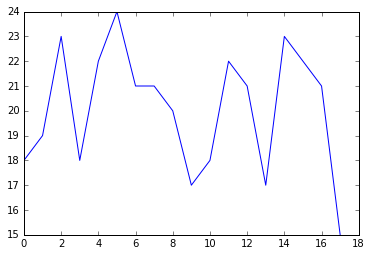

In [19]:
vals = list(range(len(total_count_list[1])))
plt.plot(vals,total_count_list[1])

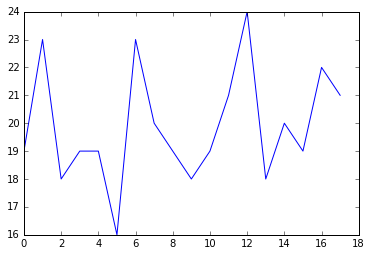

In [20]:
vals = list(range(len(total_count_list[2])))
plt.plot(vals,total_count_list[2])

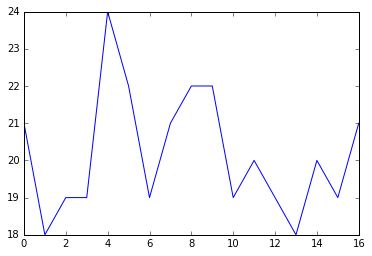

In [21]:
vals = list(range(len(total_count_list[3])))
plt.plot(vals,total_count_list[3])

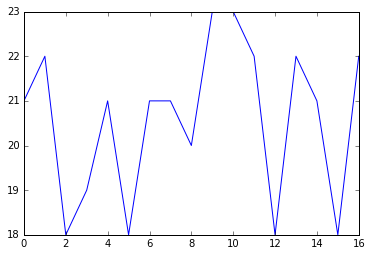

In [22]:
vals = list(range(len(total_count_list[4])))
plt.plot(vals,total_count_list[4])

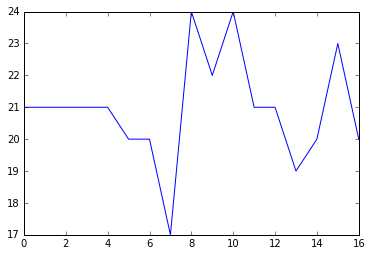

In [23]:
vals = list(range(len(total_count_list[5])))
plt.plot(vals,total_count_list[5])

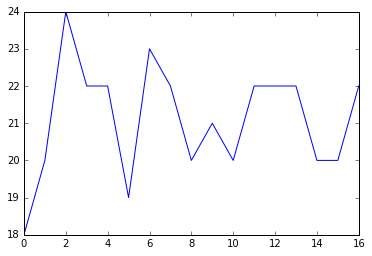

In [24]:
vals = list(range(len(total_count_list[6])))
plt.plot(vals,total_count_list[6])

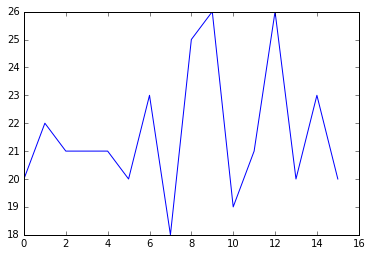

In [27]:
# plot values from 115,000 max group
vals = list(range(len(total_count_list[13])))
plt.plot(vals,total_count_list[13])

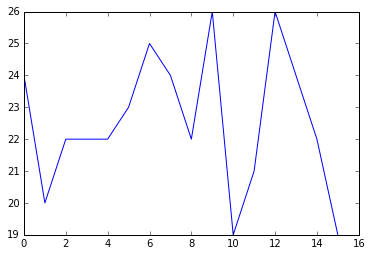

In [28]:
vals = list(range(len(total_count_list[14])))
plt.plot(vals,total_count_list[14])

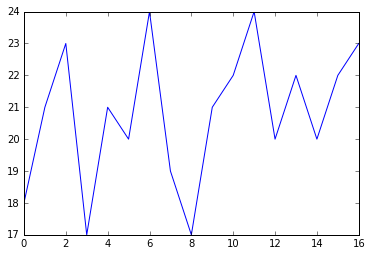

In [29]:
vals = list(range(len(total_count_list[15])))
plt.plot(vals,total_count_list[15])

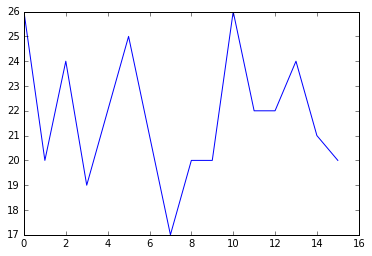

In [30]:
vals = list(range(len(total_count_list[16])))
plt.plot(vals,total_count_list[16])

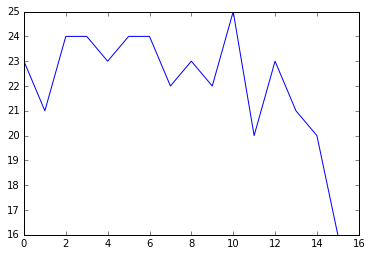

In [31]:
vals = list(range(len(total_count_list[17])))
plt.plot(vals,total_count_list[17])

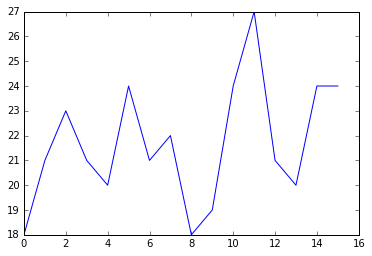

In [32]:
vals = list(range(len(total_count_list[18])))
plt.plot(vals,total_count_list[18])

//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=19.941979695139953)
Fitted anglit distribution with error=19.9622300251606)
Fitted arcsine distribution with error=19.359272189789998)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:5252: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted argus distribution with error=20.908075018079852)
Fitted beta distribution with error=19.872380108326936)
Fitted betaprime distribution with error=19.93968269512753)
Fitted bradford distribution with error=19.884648639445068)
Fitted burr distribution with error=19.95458200476372)
Fitted burr12 distribution with error=19.963085508564028)
Fitted cauchy distribution with error=20.015153564484823)
Fitted chi distribution with error=19.953387554711405)
Fitted chi2 distribution with error=21.734305409238765)
Fitted cosine distribution with error=19.942947915015466)
Fitted dgamma distribution with error=19.881601462699575)
Fitted dweibull distribution with error=19.863968630752098)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 38.666666666666671.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 39.5.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 39.333333333333329.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 39.083333333333329.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been giv

Fitted erlang distribution with error=19.94339350691035)
Fitted expon distribution with error=20.030633595114388)
Fitted exponnorm distribution with error=19.948136881081513)
Fitted exponpow distribution with error=20.907585388347304)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Fitted exponweib distribution with error=20.043144903549265)
Fitted f distribution with error=19.941948262635137)
Fitted fatiguelife distribution with error=19.941844943527908)
Fitted fisk distribution with error=19.957301637370847)
Fitted foldcauchy distribution with error=20.01307354101841)
Fitted foldnorm distribution with error=19.848421492951836)
Fitted frechet_l distribution with error=23.284522381024455)
Fitted frechet_r distribution with error=20.412461734994945)
Fitted gamma distribution with error=19.943393348856066)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2587: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=19.845860613559623)
Fitted genexpon distribution with error=19.912762659328962)
Fitted genextreme distribution with error=19.93817379734091)
Fitted gengamma distribution with error=19.951952393341674)
Fitted genhalflogistic distribution with error=20.60938913935875)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2242: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2243: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp


Fitted genlogistic distribution with error=19.95520546264857)
Fitted gennorm distribution with error=19.92792850404035)
Fitted genpareto distribution with error=20.357488454504644)
Fitted gilbrat distribution with error=20.179520066482908)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted gompertz distribution with error=20.00686985917485)
Fitted gumbel_l distribution with error=20.006813413755232)
Fitted gumbel_r distribution with error=19.960532558470305)
Fitted halfcauchy distribution with error=20.066109906014784)
Fitted halfgennorm distribution with error=20.099812248951057)
Fitted halflogistic distribution with error=19.942357474286794)
Fitted halfnorm distribution with error=19.98025558104991)
Fitted hypsecant distribution with error=19.990638314027056)
Fitted invgamma distribution with error=19.94209561641418)
Fitted invgauss distribution with error=19.941805453527472)
Fitted invweibull distribution with error=19.960521099861793)
Fitted johnsonsb distribution with error=19.03994434052188)
Fitted johnsonsu distribution with error=19.9411035648632)
Fitted kappa3 distribution with error=19.985557606939913)
Fitted kappa4 distribution with error=19.931093841401157)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


Fitted ksone distribution with error=nan)
Fitted kstwobign distribution with error=19.96203188934787)
Fitted laplace distribution with error=19.81205137358873)
Fitted levy distribution with error=20.331345497403714)
Fitted levy_l distribution with error=20.701246879146723)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=19.94674048103285)
Fitted logistic distribution with error=19.971764533827724)
Fitted loglaplace distribution with error=19.812554773615187)
Fitted lognorm distribution with error=19.941730245455666)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted lomax distribution with error=20.051685327421282)
Fitted maxwell distribution with error=19.935330433330925)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Fitted mielke distribution with error=19.947999730944662)
Fitted nakagami distribution with error=19.48405092361608)
Fitted ncf distribution with error=19.940409287436562)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3684: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted nct distribution with error=19.94152906024991)
Fitted ncx2 distribution with error=19.92605514548049)
Fitted norm distribution with error=19.947519432835406)
Fitted pareto distribution with error=20.09892000533953)
Fitted pearson3 distribution with error=19.943393743668096)
Fitted powerlaw distribution with error=19.56918249831273)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Fitted powerlognorm distribution with error=20.0907915698744)
Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=19.93575954214584)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4313: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4313: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4347: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)


Fitted rdist distribution with error=17.205854149239748)
Fitted recipinvgauss distribution with error=19.941875022283977)
Fitted reciprocal distribution with error=21.21913580246878)
Fitted rice distribution with error=19.93086514282561)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=20.000298972420794)
Fitted skewnorm distribution with error=19.943154711822096)
Fitted t distribution with error=19.947499470219025)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)
//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted trapz distribution with error=20.523798296753206)
Fitted triang distribution with error=19.878294731780674)
Fitted truncexpon distribution with error=19.873959533503992)
Fitted truncnorm distribution with error=21.21913580246878)
Fitted tukeylambda distribution with error=19.339167397973004)
Fitted uniform distribution with error=19.984567901258128)
Fitted vonmises distribution with error=4.713175103239254e+60)
Fitted vonmises_line distribution with error=19.9548818273161)
Fitted wald distribution with error=20.191364834005785)
Fitted weibull_max distribution with error=23.284522381024455)
Fitted weibull_min distribution with error=20.412461734994945)
Fitted wrapcauchy distribution with error=nan)


//anaconda/lib/python3.5/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
rdist,17.205854
johnsonsb,19.039944
tukeylambda,19.339167
arcsine,19.359272
nakagami,19.484051


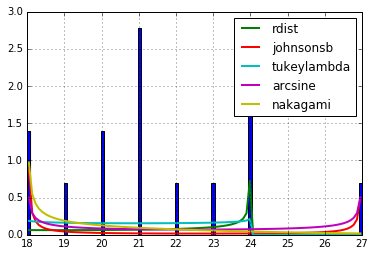

In [34]:
from fitter import Fitter
data = pd.DataFrame(total_count_list[18])
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [35]:
x = 5 + 3 * np.random.randn(100) # Generate from a N(5, 9) distribution
import scipy.stats as st

print(x)
results = st.norm.fit(x)
results

[ -2.8111762    9.54988314   5.96198816   6.7681048    7.75526274
   1.61489591   6.30676759   8.49873058   6.27860941   3.08162147
  11.49810206   7.40715844   3.44379655  10.06220782   2.16114893
   8.13997028   4.35773276   5.28679355  -1.80118769   1.64772851
   9.57273393   1.66897344   5.13367514   3.13919202  -1.44272509
   3.70918103   0.8788308    5.57616382   6.36534772   3.95757136
   6.57581476   7.37984523   6.98365671   1.27547322   3.83576461
   5.9239005    8.5420829    4.41851636   4.58180618   4.95044408
   2.52334429   5.57586091   6.86169075  -2.38414781   9.10201191
   4.75435763   1.33170638   2.2444933    0.95385282   4.77576134
   5.82937012   6.00800962   1.21875509   3.70178157  10.87423138
   9.87825084   7.45905221  -0.45189752   5.20520746   4.26846916
   4.10675638   4.22158936   5.86245917   6.77397145   1.79315987
   3.25022988   7.79335142  10.63033545  13.28179087   6.49783011
   4.83687382   9.33946455  -0.37551861   5.17429305   1.24290425
   3.21271

(4.8129478850250687, 3.1392748531003538)

In [36]:
np.mean(x), np.std(x, ddof=0)

(4.8129478850250687, 3.1392748531003538)

In [40]:
x = total_count_list[18]
results = st.norm.fit(total_count_list[18])
results

(21.6875, 2.4165768661476505)

In [41]:
np.mean(x), np.std(x, ddof=0)

(21.6875, 2.4165768661476505)